In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)
print("Dataset shape:", X.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset shape: (150, 4)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,)

In [ ]:
# init StandardScaler
scaler = StandardScaler()

# Fit the scaler and train and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Model Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 640x480 with 0 Axes>

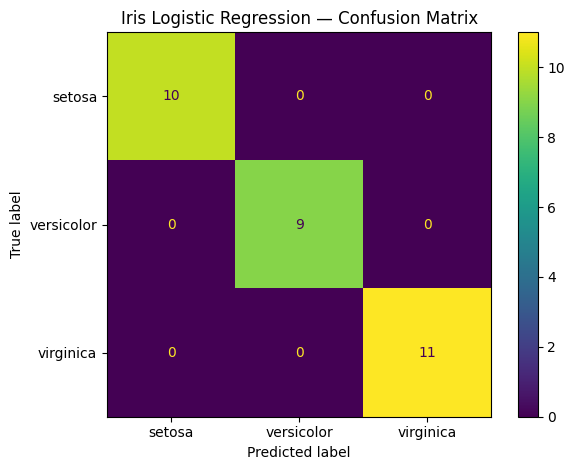

In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

fig = plt.figure()
disp.plot(values_format="d")
plt.title("Iris Logistic Regression — Confusion Matrix")
plt.tight_layout()
plt.show()

In [11]:
# Predict on 8 samples
sample_idx = np.arange(min(8, len(X_test)))
sample_features = pd.DataFrame(X_test[sample_idx], columns=feature_names)
sample_true = [target_names[i] for i in y_test[sample_idx]]
sample_pred = [target_names[i] for i in y_pred[sample_idx]]

sample_df = sample_features.copy()
sample_df["True Label"] = sample_true
sample_df["Predicted Label"] = sample_pred

sample_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),True Label,Predicted Label
0,6.1,2.8,4.7,1.2,versicolor,versicolor
1,5.7,3.8,1.7,0.3,setosa,setosa
2,7.7,2.6,6.9,2.3,virginica,virginica
3,6.0,2.9,4.5,1.5,versicolor,versicolor
4,6.8,2.8,4.8,1.4,versicolor,versicolor
5,5.4,3.4,1.5,0.4,setosa,setosa
6,5.6,2.9,3.6,1.3,versicolor,versicolor
7,6.9,3.1,5.1,2.3,virginica,virginica
